## Packages

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing, ensemble, model_selection

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Overview of the Problem set

In [2]:
history = pd.read_csv('history.csv')
history.Date = pd.to_datetime(history.Date)
history.head()

,EmployeeID,Date,DevCenterID,SBUID,PositionID,PositionLevel,IsTrainee,LanguageLevelID,CustomerID,ProjectID,...,HourLockedReserve,OnSite,CompetenceGroupID,FunctionalOfficeID,PaymentTypeId,BonusOneTime,APM,WageGross,MonthOnPosition,MonthOnSalary
0,00116D71-E87D-4B64-A566-1F29B2A798A8,2017-07-01,3,292,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,...,0,0,15,1,9,0,39,0.887446,1,1
1,00116D71-E87D-4B64-A566-1F29B2A798A8,2017-08-01,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,...,0,0,15,1,9,200,28,0.887446,2,2
2,00116D71-E87D-4B64-A566-1F29B2A798A8,2017-09-01,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,...,0,0,15,1,9,0,43,0.887446,3,3
3,00116D71-E87D-4B64-A566-1F29B2A798A8,2017-10-01,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,...,0,0,15,1,9,0,49,0.887446,4,4
4,00116D71-E87D-4B64-A566-1F29B2A798A8,2017-11-01,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,...,0,0,15,1,9,0,43,0.887446,5,5


In [3]:
employees = pd.read_csv('employees.csv')
employees.DismissalDate = pd.to_datetime(employees.DismissalDate)
employees.HiringDate = pd.to_datetime(employees.HiringDate)
employees.head()

,EmployeeID,HiringDate,DismissalDate
0,01EDC1A7-5DA7-4939-854B-0002E0DF548D,2018-09-01,NaT
1,91C351D9-38A1-40CB-9B69-000774211859,2018-01-01,2019-02-01
2,D699327D-8A78-4FBE-9CEA-001355717D3F,2018-02-01,NaT
3,22102E27-5EEA-44F9-8632-0017B04B1236,2014-10-01,2018-05-01
4,08C0AFA9-ABC3-4FAF-8DE2-0018AE9A69F4,2010-09-01,NaT


In [4]:
sample = employees.EmployeeID[0]
employees[employees.EmployeeID == sample]

,EmployeeID,HiringDate,DismissalDate
0,01EDC1A7-5DA7-4939-854B-0002E0DF548D,2018-09-01,NaT


In [5]:
history[history.EmployeeID == sample]

,EmployeeID,Date,DevCenterID,SBUID,PositionID,PositionLevel,IsTrainee,LanguageLevelID,CustomerID,ProjectID,...,HourLockedReserve,OnSite,CompetenceGroupID,FunctionalOfficeID,PaymentTypeId,BonusOneTime,APM,WageGross,MonthOnPosition,MonthOnSalary
814,01EDC1A7-5DA7-4939-854B-0002E0DF548D,2018-09-01,8,255,891,2,0,9,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,9FFB72D5-B4BC-4D26-968A-9262A49BA0DA,...,0,0,0,-1,21,110,0,0.279321,1,1
815,01EDC1A7-5DA7-4939-854B-0002E0DF548D,2018-10-01,8,255,891,2,0,9,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,9FFB72D5-B4BC-4D26-968A-9262A49BA0DA,...,0,0,0,-1,22,110,0,0.262134,2,2
816,01EDC1A7-5DA7-4939-854B-0002E0DF548D,2018-11-01,8,255,891,2,0,9,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,9FFB72D5-B4BC-4D26-968A-9262A49BA0DA,...,0,0,0,-1,22,540,0,0.255562,3,3
817,01EDC1A7-5DA7-4939-854B-0002E0DF548D,2018-12-01,8,255,891,2,0,9,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,9FFB72D5-B4BC-4D26-968A-9262A49BA0DA,...,0,0,0,-1,22,380,0,0.255562,4,4
818,01EDC1A7-5DA7-4939-854B-0002E0DF548D,2019-01-01,8,255,891,2,0,9,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,9FFB72D5-B4BC-4D26-968A-9262A49BA0DA,...,0,0,0,-1,22,313,0,0.255562,5,5
819,01EDC1A7-5DA7-4939-854B-0002E0DF548D,2019-02-01,8,255,891,2,0,9,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,9FFB72D5-B4BC-4D26-968A-9262A49BA0DA,...,0,0,0,-1,22,802,0,0.255562,6,6


In [6]:
submission = pd.read_csv('submission.csv')
submission[submission.EmployeeID == sample]

,EmployeeID,target
38,01EDC1A7-5DA7-4939-854B-0002E0DF548D,0


In [7]:
history.Date.describe()

count                   87766
unique                     20
top       2018-09-01 00:00:00
freq                     4721
first     2017-07-01 00:00:00
last      2019-02-01 00:00:00
Name: Date, dtype: object

In [8]:
history.dtypes

EmployeeID                    object
Date                  datetime64[ns]
DevCenterID                    int64
SBUID                          int64
PositionID                     int64
PositionLevel                  int64
IsTrainee                      int64
LanguageLevelID                int64
CustomerID                    object
ProjectID                     object
IsInternalProject              int64
Utilization                  float64
HourVacation                   int64
HourMobileReserve              int64
HourLockedReserve              int64
OnSite                         int64
CompetenceGroupID              int64
FunctionalOfficeID             int64
PaymentTypeId                  int64
BonusOneTime                   int64
APM                            int64
WageGross                    float64
MonthOnPosition                int64
MonthOnSalary                  int64
dtype: object

Общее количество работников за все время

In [9]:
employees.shape[0]

5373

Количество работников, которые до сих пор работают

In [10]:
hired_emplID = employees[employees.DismissalDate.isna()].EmployeeID
hired_emplID.shape[0]

4356

Количество работников, которые уволились

In [11]:
dismissed_emplID = employees[employees.DismissalDate.notna()].EmployeeID
dismissed_emplID.shape[0]

1017

Количество работников, которые предсказываются 

In [12]:
predict_emplID = submission.EmployeeID
submission.shape[0]

4156

О потерянных 200 работниках: These employees are of no interest to risk assessment in terms of this competition due to specific circumstances with their employment that are not reflected in the historical data. Please, consider them as "still working" employees

История работников, которые до сих пор работают

In [13]:
hired_empl_history = history[history.EmployeeID.isin(hired_emplID.values)].set_index(['EmployeeID', 'Date'])
hired_empl_history['IsHired'] = True
hired_empl_history

DevCenterID  SBUID  \
EmployeeID                           Date                             
00116D71-E87D-4B64-A566-1F29B2A798A8 2017-07-01            3    292   
                                     2017-08-01            3    332   
                                     2017-09-01            3    332   
                                     2017-10-01            3    332   
                                     2017-11-01            3    332   
...                                                      ...    ...   
FFF3B179-1D20-40FF-A330-A051BDF37301 2018-10-01            1    295   
                                     2018-11-01            1    295   
                                     2018-12-01            1    295   
                                     2019-01-01            1    295   
                                     2019-02-01            1    295   

                                                 PositionID  PositionLevel  \
EmployeeID                           Date                                    
00116D71-E87D-4B64-A566-1F29B2A798A8 2017-07-01          70              2   
                                     2017-08-01          70              2   
                                     2017-09-01          70              2   
                                     2017-10-01          70              2   
                                     2017-11-01          70              2   
...                                                     ...            ...   
FFF3B179-1D20-40FF-A330-A051BDF37301 2018-10-01           2              1   
                                     2018-11-01           2              1   
                                     2018-12-01           2              1   
                                     2019-01-01           2              1   
                                     2019-02-01           2              1   

                                                 IsTrainee  LanguageLevelID  \
EmployeeID                           Date                                     
00116D71-E87D-4B64-A566-1F29B2A798A8 2017-07-01          0               11   
                                     2017-08-01          0               11   
                                     2017-09-01          0               11   
                                     2017-10-01          0               11   
                                     2017-11-01          0               11   
...                                                    ...              ...   
FFF3B179-1D20-40FF-A330-A051BDF37301 2018-10-01          1               18   
                                     2018-11-01          1               18   
                                     2018-12-01          0               18   
                                     2019-01-01          0               18   
                                     2019-02-01          0               18   

                                                                           CustomerID  \
EmployeeID                           Date                                               
00116D71-E87D-4B64-A566-1F29B2A798A8 2017-07-01  893EA22F-08BE-4F11-AD93-C50746E4565F   
                                     2017-08-01  893EA22F-08BE-4F11-AD93-C50746E4565F   
                                     2017-09-01  893EA22F-08BE-4F11-AD93-C50746E4565F   
                                     2017-10-01  893EA22F-08BE-4F11-AD93-C50746E4565F   
                                     2017-11-01  893EA22F-08BE-4F11-AD93-C50746E4565F   
...                                                                               ...   
FFF3B179-1D20-40FF-A330-A051BDF37301 2018-10-01  9417F950-B661-48E8-84CF-8DDB1F8FDB50   
                                     2018-11-01  9417F950-B661-48E8-84CF-8DDB1F8FDB50   
                                     2018-12-01  9417F950-B661-48E8-84CF-8DDB1F8FDB50   
                                     2019-01-01  9417F950-B661-48E8-84CF-8DDB1F8FDB50   
              

История работников, которые уволились

In [59]:
dismissed_empl_history = history[history.EmployeeID.isin(dismissed_emplID.values)].set_index(['EmployeeID', 'Date'])
dismissed_empl_history['IsHired'] = False
dismissed_empl_history.nunique()

DevCenterID             21
SBUID                   98
PositionID             159
PositionLevel            9
IsTrainee                2
LanguageLevelID         17
CustomerID             160
ProjectID              664
IsInternalProject        2
Utilization            565
HourVacation            37
HourMobileReserve       51
HourLockedReserve       45
OnSite                   2
CompetenceGroupID       22
FunctionalOfficeID       8
PaymentTypeId           15
BonusOneTime           472
APM                    301
WageGross             1949
MonthOnPosition         20
MonthOnSalary           20
IsHired                  1
dtype: int64

## Графики

In [60]:
countplot_columns = ['PositionLevel', 
                     'IsTrainee', 
                     'LanguageLevelID',
                     'IsInternalProject', 
                     'OnSite', 
                     'PaymentTypeId',
                     'FunctionalOfficeID',
                    ]

IndexError: list index out of range

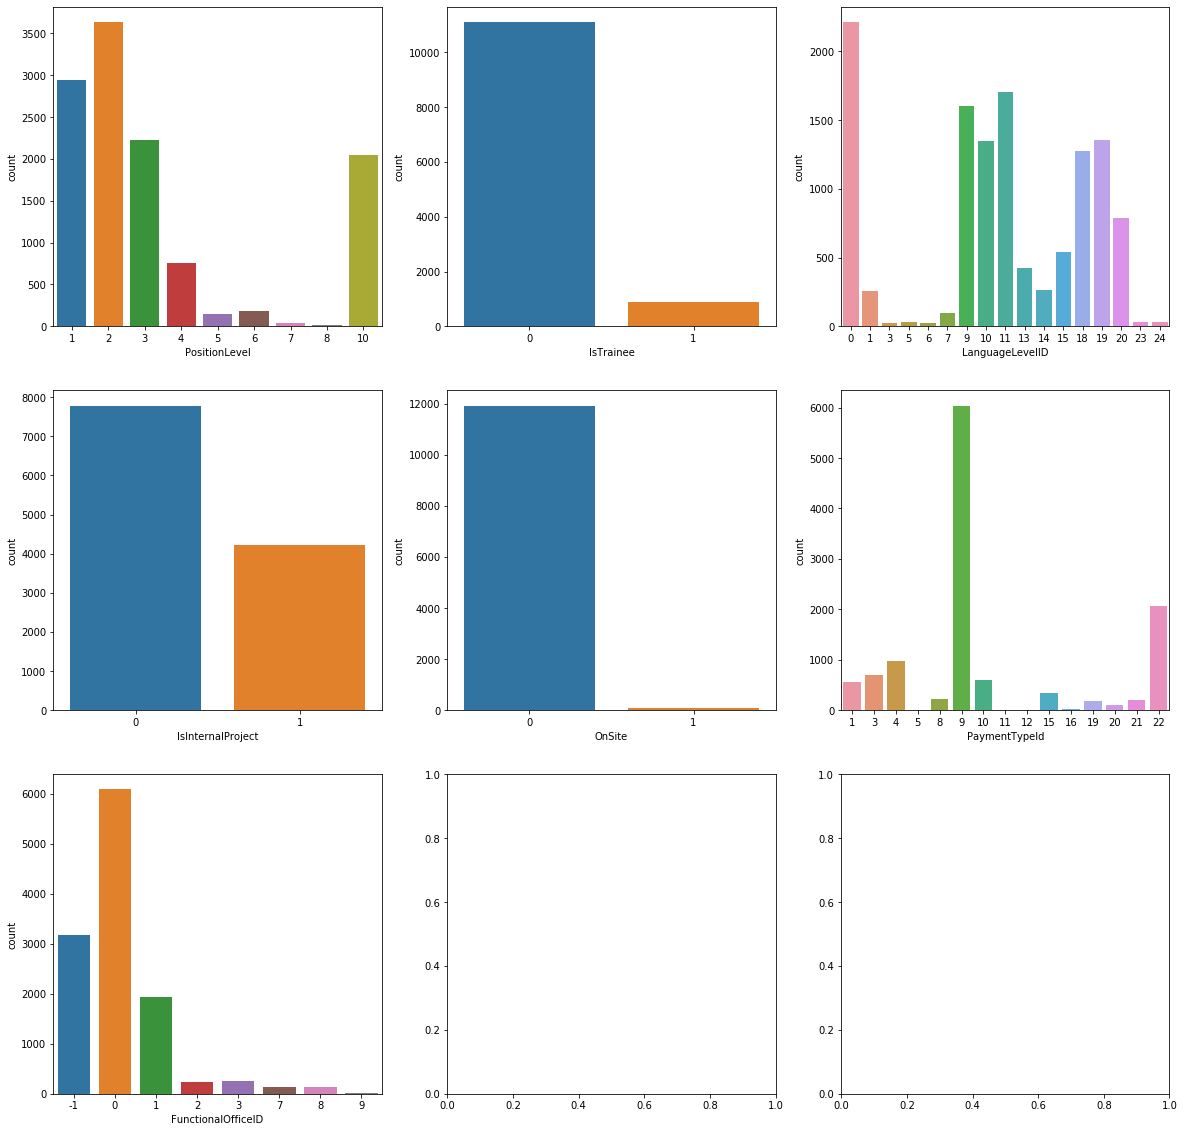

In [76]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
for idx, ax in enumerate(ax.flat):
    sns.countplot(x=countplot_columns[idx], data=dismissed_empl_history, ax=ax) #row=0, col=0
fig.show()

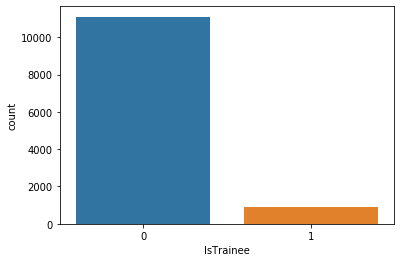

In [48]:
hired_data = pd.concat([dismissed_empl_history, hired_empl_history])
sns.countplot(x='IsTrainee', data=dismissed_empl_history)

<Figure size 720x576 with 0 Axes>

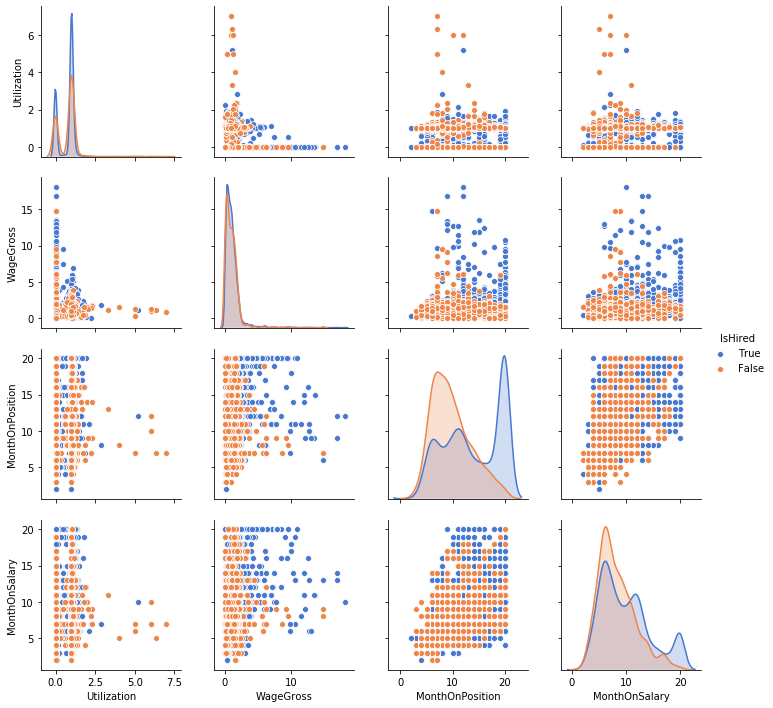

In [15]:
paiplot_columns = ['IsHired', 'Utilization', 'WageGross', 'MonthOnPosition', 'MonthOnSalary']
paiplot_data = pd.concat([dismissed_empl_history[paiplot_columns].groupby('EmployeeID').max(),
                          hired_empl_history[paiplot_columns].groupby('EmployeeID').max()])

plt.figure(figsize=(10,8))
sns.pairplot(paiplot_data, hue = 'IsHired', hue_order=[True, False], palette = 'muted', diag_kind='kde', vars=paiplot_columns[1:])

Выводы:
1. Работники увольняются в большинстве на 8-9 месяце пребывания на одной позиции. После преодоления 10-месячного рубежа работники все меньше склонны увольняться.
2. Решение не зависит от зарплаты, так как плотности максимальных WageGross за карьеру распределены одинаково.

## Пытаемся разделить данные на тест и обучение

Перечислим все даты

In [16]:
hist_dates = history.Date.unique()
hist_dates

array(['2017-07-01T00:00:00.000000000', '2017-08-01T00:00:00.000000000',
       '2017-09-01T00:00:00.000000000', '2017-10-01T00:00:00.000000000',
       '2017-11-01T00:00:00.000000000', '2017-12-01T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000', '2018-02-01T00:00:00.000000000',
       '2018-03-01T00:00:00.000000000', '2018-04-01T00:00:00.000000000',
       '2018-05-01T00:00:00.000000000', '2018-06-01T00:00:00.000000000',
       '2018-07-01T00:00:00.000000000', '2018-08-01T00:00:00.000000000',
       '2018-09-01T00:00:00.000000000', '2018-10-01T00:00:00.000000000',
       '2018-11-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000', '2019-02-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

Так как я не умею в Тайм Сериес, буду собирать статичный датасет. Будем групировать по работникам. Функции для агрегации:

In [17]:
agg_funcs = {}
              
for col in concatenate([history.columns[2:8], history.columns[10:]]):
    agg_funcs[col] = 'mean'
    if col in ['MonthOnPosition', 'MonthOnSalary', 'IsTrainee','OnSite', 'IsInternalProject', 'LanguageLevelID']:
        agg_funcs[col] = 'max'
    if col in ['BonusOneTime', 'HourVacation', 'PositionLevel']:
        agg_funcs[col] = 'sum'
agg_funcs

{'DevCenterID': 'mean',
 'SBUID': 'mean',
 'PositionID': 'mean',
 'PositionLevel': 'sum',
 'IsTrainee': 'max',
 'LanguageLevelID': 'max',
 'IsInternalProject': 'max',
 'Utilization': 'mean',
 'HourVacation': 'sum',
 'HourMobileReserve': 'mean',
 'HourLockedReserve': 'mean',
 'OnSite': 'max',
 'CompetenceGroupID': 'mean',
 'FunctionalOfficeID': 'mean',
 'PaymentTypeId': 'mean',
 'BonusOneTime': 'sum',
 'APM': 'mean',
 'WageGross': 'mean',
 'MonthOnPosition': 'max',
 'MonthOnSalary': 'max'}

Каждая партия данных содержит все данные о работниках, которые в определенный момент времени работают в компании. В столбце таргета 1 или 0 - уволился работник в период след 3 месяцев или нет. Партии берутся с периодом в 3 месяца, начиная со 2.

Данные из 'CustomerID' и 'ProjectID' не учитываются.

In [18]:
data_batches = []
employeesID = employees.EmployeeID
# employees.set_index('EmployeeID')
for date in hist_dates[2::3]:
    period_employees = history[history.Date == date].EmployeeID
    period_data = history[history.EmployeeID.isin(employeesID) & (history.Date <= date)]
    period_data = period_data.drop(columns=['CustomerID', 'ProjectID', 'Date']).groupby('EmployeeID').agg(agg_funcs)
    period_data['target'] = 0
    
    for employee in period_employees:
        dismiss_date = employees[employees.EmployeeID == employee].iloc[0].DismissalDate
        
        if not pd.isnull(dismiss_date):
            
            if (dismiss_date - date) < np.timedelta64(3, 'M'):
                period_data.at[employee, 'target'] = 1
    data_batches.append(period_data)

len(data_batches)

6

In [19]:
data_batches[0].columns

Index(['DevCenterID', 'SBUID', 'PositionID', 'PositionLevel', 'IsTrainee',
       'LanguageLevelID', 'IsInternalProject', 'Utilization', 'HourVacation',
       'HourMobileReserve', 'HourLockedReserve', 'OnSite', 'CompetenceGroupID',
       'FunctionalOfficeID', 'PaymentTypeId', 'BonusOneTime', 'APM',
       'WageGross', 'MonthOnPosition', 'MonthOnSalary', 'target'],
      dtype='object')

Соединяем необходимое нам число партий в обучающую выборку. Балансируем выборку бутстрепом. Разбиваем на данные и таргет. 

In [20]:
from sklearn.utils import resample

train_data_x = []
train_data_y = []
for batch in data_batches[-1:]:
    batch_minority = batch[batch.target == 1]
    batch_majority = batch[batch.target == 0]
    batch_minority_upsampled = resample(batch_minority, replace=True, n_samples=batch.shape[0], random_state=123)
    batch_balanced = pd.concat([batch_majority, batch_minority_upsampled])
    train_data_x.append(batch_balanced.drop('target', axis=1))
    train_data_y.append(batch_balanced.target)
    
train_data_x = concatenate(train_data_x)
train_data_y = concatenate(train_data_y)
train_data_x.shape, train_data_y.sum()

((10565, 20), 5373)

Стандартизируем данные.

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_data_x)
train_data_x = scaler.transform(train_data_x)
train_data_x

array([[-0.34369455,  0.47017803, -0.333095  , ...,  0.02157161,
         1.11111694,  1.27749316],
       [-0.59451254, -2.31887834,  0.25240141, ..., -0.23724599,
        -0.38021978,  0.27258165],
       [-0.59451254, -1.59597272, -0.28347666, ..., -0.30045306,
         1.32416504,  0.7750374 ],
       ...,
       [-0.46910355,  0.67283875, -0.2231512 , ..., -0.61940707,
        -0.59326788, -1.23478561],
       [-0.59451254,  0.6024018 , -0.68773555, ...,  0.22791427,
        -1.23241219, -1.48601348],
       [ 0.28335043, -0.05959968, -0.49299289, ..., -0.57333406,
        -1.23241219, -0.73232985]])

Сохраняю свои труды в файлики.

In [22]:
np.savetxt('train_data_x.csv', train_data_x, delimiter=',')
np.savetxt('train_data_y.csv', train_data_y, delimiter=',')

Аналогично создаем выборку, на которой будем прогнозировать.

In [23]:
employeesID = submission.EmployeeID
date = hist_dates[-1]
submit_data_x = history[history.EmployeeID.isin(employeesID)]
submit_data_x = submit_data_x.drop(columns=['CustomerID', 'ProjectID', 'Date']).groupby('EmployeeID').agg(agg_funcs)
submit_data_x = np.array(submit_data_x)
submit_data_x

array([[3.00000000e+00, 3.03600000e+02, 8.52500000e+01, ...,
        9.24879133e-01, 1.70000000e+01, 1.40000000e+01],
       [2.00000000e+00, 2.72000000e+02, 1.29750000e+02, ...,
        6.47709430e-01, 1.00000000e+01, 5.00000000e+00],
       [1.00000000e+00, 5.50000000e+01, 2.06000000e+02, ...,
        3.66344015e-01, 2.00000000e+01, 1.10000000e+01],
       ...,
       [8.00000000e+00, 3.25300000e+02, 4.00000000e+00, ...,
        1.63061800e+00, 2.00000000e+01, 2.00000000e+01],
       [1.00000000e+00, 2.90000000e+01, 1.21000000e+02, ...,
        3.64515060e-01, 2.00000000e+01, 1.30000000e+01],
       [1.00000000e+00, 2.95000000e+02, 1.50000000e+00, ...,
        2.41862820e-01, 5.00000000e+00, 4.00000000e+00]])

In [24]:
scaler.fit(submit_data_x)
submit_data_x = scaler.transform(submit_data_x)
submit_data_x

array([[-0.18114409,  0.45184119, -0.41787302, ..., -0.06322304,
         0.56322404,  0.88109847],
       [-0.36586211,  0.13361151, -0.23964374, ..., -0.31636445,
        -0.73688814, -1.08751794],
       [-0.55058014, -2.0516999 ,  0.06574911, ..., -0.57333783,
         1.12041497,  0.224893  ],
       ...,
       [ 0.74244605,  0.67037233, -0.74329163, ...,  0.58133416,
         1.12041497,  2.19350941],
       [-0.55058014, -2.31353444, -0.27468883, ..., -0.57500823,
         1.12041497,  0.66236332],
       [-0.55058014,  0.36523438, -0.75330451, ..., -0.68702754,
        -1.6655397 , -1.30625309]])

In [25]:
np.savetxt('submit_data_x.csv', submit_data_x, delimiter=',')

## Прогнозирование

In [27]:
train_data_x

array([[-0.34369455,  0.47017803, -0.333095  , ...,  0.02157161,
         1.11111694,  1.27749316],
       [-0.59451254, -2.31887834,  0.25240141, ..., -0.23724599,
        -0.38021978,  0.27258165],
       [-0.59451254, -1.59597272, -0.28347666, ..., -0.30045306,
         1.32416504,  0.7750374 ],
       ...,
       [-0.46910355,  0.67283875, -0.2231512 , ..., -0.61940707,
        -0.59326788, -1.23478561],
       [-0.59451254,  0.6024018 , -0.68773555, ...,  0.22791427,
        -1.23241219, -1.48601348],
       [ 0.28335043, -0.05959968, -0.49299289, ..., -0.57333406,
        -1.23241219, -0.73232985]])

In [29]:
submit_data_x

array([[-0.18114409,  0.45184119, -0.41787302, ..., -0.06322304,
         0.56322404,  0.88109847],
       [-0.36586211,  0.13361151, -0.23964374, ..., -0.31636445,
        -0.73688814, -1.08751794],
       [-0.55058014, -2.0516999 ,  0.06574911, ..., -0.57333783,
         1.12041497,  0.224893  ],
       ...,
       [ 0.74244605,  0.67037233, -0.74329163, ...,  0.58133416,
         1.12041497,  2.19350941],
       [-0.55058014, -2.31353444, -0.27468883, ..., -0.57500823,
         1.12041497,  0.66236332],
       [-0.55058014,  0.36523438, -0.75330451, ..., -0.68702754,
        -1.6655397 , -1.30625309]])

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 0)
lr.fit(train_data_x, train_data_y)
submit_data_y = lr.predict(submit_data_x)
len(submit_data_x), submit_data_y.sum()

C:\Users\Kate\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(4156, 2302)

In [32]:
submit_df = pd.read_csv('submission.csv')
test_id = submit_df.EmployeeID

In [33]:
submission = pd.DataFrame({'EmployeeID': test_id, 'target':submit_data_y})
submission.target = submission.target.astype(int)
submission.to_csv('my_submission.csv', index=False)

## Research..

In [ ]:
model = ensemble.RandomForestClassifier()

